# Вектора

In [68]:
import functools
import math
import matplotlib.pyplot as plt
import collections as clt
import random as rnd

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Суммирование векторов

In [69]:
def vector_add(v,w):
    return [v_i + w_i
            for v_i, w_i in zip(v,w)]

In [70]:
vector_add([1,2],[2,1])

[3, 3]

Разница векторов

In [71]:
def vector_subtract(v,w):
    return [v_i - w_i
           for v_i, w_i in zip(v,w)]

In [72]:
vector_subtract([0,15,10,-1],[2,5,6,1])

[-2, 10, 4, -2]

Покомпонентная сумма списка векторов

In [73]:
def vector_sum(vectors):
    return functools.reduce(vector_add,vectors)

In [74]:
vector_sum([[1,2],[1,2],[10,10]])

[12, 14]

Умножение вектора на скаляр

In [75]:
def scalar_multiply(scalar,vector):
    return [scalar * v_i for v_i in vector]

In [76]:
scalar_multiply(5,[1,1])

[5, 5]

Вычисление покомпонентного среднего значения списка векторов(одинакового размера)

In [77]:
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [78]:
vector_mean([[1,2],[1,2],[10,10]])

[4.0, 4.666666666666666]

Вычисление скалярного произведения. 
Скалярное произведение - сумма двух векторов их покомпонентных произведений

In [79]:
def dot(v,w):
    return sum(v_i * w_i
              for v_i , w_i in zip(v,w))

In [80]:
dot([1,1],[1,1])

2

Вычисление суммы квадратов вектора

In [81]:
def sum_of_squares(v):
    return dot(v,v)

In [82]:
sum_of_squares([2,2])

8

Вычисление величины(длинны) вектора

In [83]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [84]:
magnitude([2,2])

2.8284271247461903

#### Растстояние между двумя векторами по формуле
> 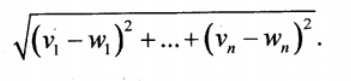

Квадрат расстояние между двумя векторами

In [85]:
def squared_distance(v,w):
    return sum_of_squares(vector_subtract(v,w))

In [86]:
squared_distance([2,2],[2,2])

0

расстояние между двумя векторами

In [87]:
def distance(v,w):
    return math.sqrt(squared_distance(v,w))

In [88]:
distance([15,1],[1,15])

19.79898987322333

# Матрицы

Образование формы матрицы:


In [89]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows , num_cols

In [90]:
Matrix = [[1,1,1],
          [0,1,0],
          [1,0,1]]
shape(Matrix)

(3, 3)

Получение строк и столбцов матрицы

In [91]:
def get_row(A,i):
    '''Get i matrix row'''
    return A[i]
def get_column(A,j):
    '''Get j matrix column'''
    return [A_i[j]
           for A_i in A]

In [92]:
A = [[1,0,1],
    [0,1,0],
    [1,0,1]]

In [93]:
get_row(A,1)

[0, 1, 0]

In [94]:
get_column(A,0)

[1, 0, 1]

Генерация Матрицы по размеру

In [95]:
def make_matrix(num_rows,num_cols,entry_fn):
    '''Matrix generation by num_rows, num_cols and entry function'''
    return [[entry_fn(i,j)
           for j in range(num_cols)]
           for i in range(num_rows)]

Входная функция для функции генерации представленной выше, которая
позволяет генерировать единичную матрицу(единицы по диагонали)

In [96]:
def is_diagonal(i,j):
    return 1 if i == j else 0

In [97]:
identity_matrix = make_matrix(3,3, is_diagonal)

In [98]:
identity_matrix

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

Матрицы мы можем использовать для представления набора данных, состоящего из нескольких векторов, рассматривая каждую строку матрицы в качестве вектора. Например, если имеются данные о росте, весе и возрасте n количества человек, то их можно представить в виде матрицы n x 3. 

In [99]:
#Пример для примечание выше в случае с данными о трёх особях
data = [[175,68,40],
        [163,64,26],
        [193,78,19]]

Матрицу размера n x k можно использовать в качестве линейной функции, которая отображает k-мерные векторы в n-мерные. Некоторые методы и концепции при анализе данных будут использовать подобные функции.

### Матрицу 
также можно использовать для двоичного представления дружеских связей. Например в социальной сети друзей можно представить в виде множества пар
(i,j). Альтернативная реализация подразумевает создание матрицы смежности, т.е такой матрицы А, что элемент А[i][j] равен 1, если узлы i и j связаны между собой и следовательно 0 в противных случаях.

In [100]:
#Вид взаимосвязей между аккаунтами приведённом в начале примечания выше
friendships = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
              (4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

In [101]:
#Вид взаимосвязей между аккаунтами приведнном
#с помощью матрицы из примечания выше

# пользователь: 1 2 3 4 5
friendships = [[0,1,1,1,0],
               [1,0,1,0,1],
               [1,0,1,1,1],
               [0,1,1,1,0],
               [0,1,1,0,0],]

#При отсутсвии каких либо взаимосвязей:

friendships = [[0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],]

#Все друг с другом дружат:

friendships = [[1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],]

# СТАТИСТИКА

## Описание одиночного набора данных

Любой набор данных очевидным образом характеризует сам себя

In [102]:
# Число друзей
num_friends = [100,49,41,40,25]

#будем использовать далее случайным образом сгенерированную выборку 
#данных для наглядности

#примечание: в данном примере не будет использоваться библиотека numpy
#которую зачастую для подобных задач и используют

num_friends = []
for i in range(0,100):
    n = rnd.randint(5,100)
    num_friends.append(n)
#print(num_friends)

Такое описание может оказаться наилучшим для сравнительного небольшого набора данных. Но для более объемного набора данных это будет выглядеть очень громоздко и, скорее всего, непрозрачно.

Просто представьте , что у вас перед глазами список и 1 млн чисел.
По этой причине пользуются статистиками(стат.показателями), при помощи которых обобщают и передают информацию о существенных признаках, присутствующих в данных.

Вначале вы помещаете количество друзей на гистограмму, испольуя словарь Counter и метод plt.bar

Counter({68: 4, 98: 4, 8: 4, 47: 3, 100: 3, 13: 3, 74: 3, 53: 3, 80: 3, 77: 3, 85: 2, 27: 2, 34: 2, 25: 2, 28: 2, 69: 2, 21: 2, 46: 2, 66: 2, 10: 2, 87: 2, 39: 2, 50: 2, 58: 2, 48: 2, 11: 2, 64: 2, 16: 2, 35: 1, 36: 1, 94: 1, 19: 1, 84: 1, 59: 1, 6: 1, 40: 1, 29: 1, 70: 1, 56: 1, 24: 1, 45: 1, 12: 1, 7: 1, 99: 1, 22: 1, 54: 1, 41: 1, 82: 1, 95: 1, 97: 1, 67: 1, 38: 1, 71: 1, 86: 1, 73: 1, 96: 1, 81: 1, 72: 1, 65: 1})


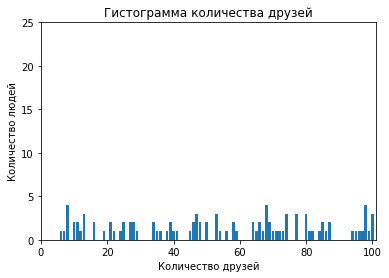

In [103]:
friend_counts = clt.Counter(num_friends)
print(friend_counts)
xs = range(101)                     # максимальное значение 100
ys = [friend_counts[x] for x in xs] # высота - количество друзей
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title('Гистограмма количества друзей')
plt.xlabel('Количество друзей')
plt.ylabel('Количество людей')
plt.show()



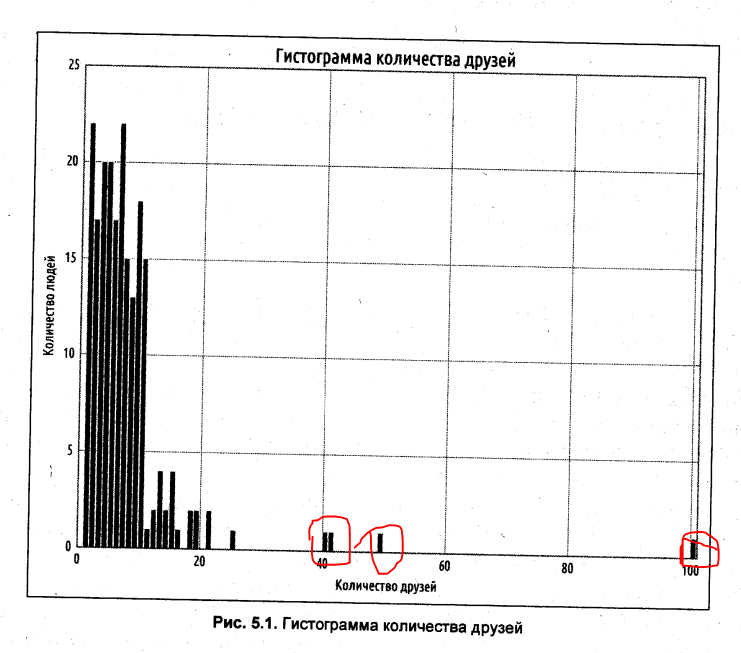

На диаграмме выше красным выделены самые "дружелюбные", однако в некоторых случаях подобные данные можно считать за аномальные, в сравнении с общей тенденцией.

К сожалению, эта диаграмма мало информативна, поэтмоу мы приступим к форматированию некоторых статистик.

самый простой статистикой является число точек данных:

In [104]:
num_points = len(num_friends) # число точек

In [105]:
num_points

100

Кроме этого, могут быть интересны наибольшие и наименьшие значения:

In [106]:
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)

100
6


А также полезными могут быть:

In [107]:
sorted_values = sorted(num_friends) #Отсортированные значение
smallest_value = sorted_values[0] #Минимум отсортированного списка
second_smallest_value = sorted_values[1] #Следующий минимум
second_largest_value = sorted_values[-2] #Второй максимум с конца

In [108]:
print(sorted_values, '\n', 'min = ',smallest_value,
      '\n second smallest = ',second_smallest_value,
      '\n second largest = ',second_largest_value,)

[6, 7, 8, 8, 8, 8, 10, 10, 11, 11, 12, 13, 13, 13, 16, 16, 19, 21, 21, 22, 24, 25, 25, 27, 27, 28, 28, 29, 34, 34, 35, 36, 38, 39, 39, 40, 41, 45, 46, 46, 47, 47, 47, 48, 48, 50, 50, 53, 53, 53, 54, 56, 58, 58, 59, 64, 64, 65, 66, 66, 67, 68, 68, 68, 68, 69, 69, 70, 71, 72, 73, 74, 74, 74, 77, 77, 77, 80, 80, 80, 81, 82, 84, 85, 85, 86, 87, 87, 94, 95, 96, 97, 98, 98, 98, 98, 99, 100, 100, 100] 
 min =  6 
 second smallest =  7 
 second largest =  100


## Показатели центра распределения 

Обычно мы хотим иметь некоторое предствавление о том, где находится центр данных. Чаще всего для этих целей используется среднее(или среденее арифметическое) значение, которое берется как сумма данных, деленная на их количество.

In [109]:
# среднее значение
def mean(x):
    return sum(x) / len(x)

In [110]:
mean(num_friends)

53.51

Для двух точек средней является точка, лежащая посередине между ними. По мере добавление других точек срендеее значение будет смещаться в разные стороны, в зависимости от значения каждого новой точки

Кроме среднего значнеие, иногда может понадобиться медиана, которая является ближайщим к центру значением (если число точек данных нечетное) либо средним арифметическим, взятым как полусумма двух ближайщих к центру значнией(если число точек чётное).

##### обратите внимание 
Медиана, в отличии от среднего значего - не зависит от каждого значение в наборе данных. Например, если сделать наибольшую точку еще больше( или найменьшую точку еще меньше), то срединные точки останутся неизменными, следовательно, и медиана не изменится.

Функция вычисления медианы имеет более сложную реализацию, чем можно было бы ожидать, в основном из-за того, что приходится учитывать случай с четностью:

In [111]:
def median(v):
    '''Возвращает ближайшее к середине значение для v'''
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2 # Индекс серединного значения
    
    if n % 2 == 1:
        #Если нечетное, вернуть серединное значение
        return sorted_v[midpoint]
    else:
        #Если четное, вернуть среднее 2=х серединных значений
        lo = midpoint - 1
        hi = midpoint
        return(sorted_v[lo] + sorted_v[hi]) / 2


In [112]:
median(num_friends)

53.5

Среднее значение, конечно, вычисляется проще, и оно несколько варьирует по мере изменения данных. Если у нас есть n точек, и одна из них увелиилась на любое малое число e , то среднее обязательно увеличится на e/n. (Этот факт делает его подверженным разного рода ухищрениям при калькуляции)
А для того чтобы найти медиану, данные нужно сперва отсортировать, и изменение одной из точек на любое малое число e может увиличить медиану на величину равную e, меньшую чем е, либо не изменить совсем( в зависимости от набора данных).


In [113]:
#Квантиль

def quantile(x,p):
    '''Возвращает значение в х , соответсвующее р-ому проценту данных'''
    p_index = int(p*len(x))
    return sorted(x)[p_index]

print(quantile(num_friends,0.10), '\n',
      quantile(num_friends,0.25), '\n',
      quantile(num_friends,0.75), '\n',
      quantile(num_friends,0.90), '\n',)

12 
 28 
 77 
 96 



Реже испольщуют моду - значение или значения, которые встречаются наиболее часто:

In [114]:
#Мода
def mode(x):
    counts = clt.Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]
print(mode(num_friends))

[68, 98, 8]


## Показатели вариации

Показатели вариации отражают меру изменчивости данных. Как правило, это статистические показатели, для которых значения, близкие к нулю, означиют полное отсутсвие изменчиваости, а большие значения(чтобы это ни означало) - очени большую изменчивость. Например, самым простым показателем является размах, который определяется как разница между максимальным и минимальным значениями данных:

In [115]:
#рамзах
#слово range в Python уже используется, поэтмоу берем другое
def data_range(x):
    return max(x) - min(x)
data_range(num_friends)

94

Размах равен нулю, когда max и min одинаковые, что происходит только  тогда, когда все элементы х равны между собой, и значит, изменчивость в данных отсутствует. И наоборот, когда размах широкий, то максимальное много больше минимального, и изменчивость в данных высокая.

Более точным показателем вариации является дисперсия, вычисляемаема как:

In [116]:
#Сумма квадратов
def sum_of_squares(x):
    return sum(x * x for x in x)
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

#Вариация
def variance(x):
    n=len(x)
    deviations = de_mean(x)    
    return sum_of_squares(deviations) / (n-1)

При этом, в каких бы единицах ни измерялись данные (в "друзьях", например), все показатели центра распределения вычиляются в тех же самых единицах измерения. Аналогичная ситуация и с размахом. Дисперсия же измеряется в единицах, которые представляют собой квадрат исходных единиц("Друзья в квадрате"). 
Поскольку такие единицы измерения трудно интерпретировать, то вместо дисперсии мы будем чаще обращаться к стандартному отклонению( корень из дисперсии ): 

In [117]:
 #стандартное отклонение

def standard_deviation(x):
    return math.sqrt(variance(x))

In [118]:
standard_deviation(num_friends)

28.84073122820879

Размах и стандартное отклонение так же чувствительны к выбросам, как и среднее. На том же самом примере, если бы у самого дружелюбного пользователя было 200 друзей вместо 100, то стандартное отклонение было бы на 60% больше.

Более надежной альтернативой является вычисление интерквартильного размаха или разности между значнием, соответствующим 75% и значением, соотвествующим 25% данных:

In [119]:
# интерквартильный размах

def interquartile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)

interquartile_range(num_friends)

49

## Корреляция

Корреляция - взаимная связь, соотношение

Сперва обратимся к ковариации - парному аналогу дисперсии. В отличие от дсперсии, коорая измеряет отклонение одной переменной от ее среднего, ковариация измеряет совместное отклонение двух переменныъ от своих средних.

Будем разбиратьсоя на случайно сгенерированном массиве данных о времени посещения каждым пользователем сайта и количестве друзей.

In [120]:
num_time = []
for i in range(0,100):
    n = rnd.randint(0,50)
    num_time.append(n)


#num_time = sorted(num_time) #Отсортированные значение
#rnd.shuffle(num_time)
print(num_time)

num_friends = sorted(num_friends)
print(num_friends)

[46, 19, 27, 37, 29, 50, 11, 9, 25, 7, 27, 43, 48, 49, 22, 2, 9, 23, 3, 8, 6, 0, 7, 32, 41, 13, 50, 37, 13, 29, 47, 46, 13, 32, 5, 15, 22, 44, 28, 31, 32, 26, 43, 0, 50, 15, 20, 19, 29, 7, 16, 27, 10, 7, 27, 19, 44, 8, 30, 18, 0, 32, 3, 28, 13, 16, 31, 1, 37, 39, 47, 28, 45, 5, 16, 35, 48, 19, 24, 17, 43, 14, 10, 30, 24, 28, 39, 13, 4, 1, 45, 30, 11, 5, 2, 0, 40, 43, 27, 43]
[6, 7, 8, 8, 8, 8, 10, 10, 11, 11, 12, 13, 13, 13, 16, 16, 19, 21, 21, 22, 24, 25, 25, 27, 27, 28, 28, 29, 34, 34, 35, 36, 38, 39, 39, 40, 41, 45, 46, 46, 47, 47, 47, 48, 48, 50, 50, 53, 53, 53, 54, 56, 58, 58, 59, 64, 64, 65, 66, 66, 67, 68, 68, 68, 68, 69, 69, 70, 71, 72, 73, 74, 74, 74, 77, 77, 77, 80, 80, 80, 81, 82, 84, 85, 85, 86, 87, 87, 94, 95, 96, 97, 98, 98, 98, 98, 99, 100, 100, 100]


In [121]:
def covariance(x,y):
    '''Ковариация между х и у'''
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

covariance(num_friends, num_friends)

831.7877777777777

Когда соответсующие элементы векторов х и у оба одновременно выше или ниже своих средних, то в сумму входит положительное число. Когда один из них находится выше своего среднего, а другой - ниже, то в сумму входит отрицательное число. 

### следовательно
"Большая" положительная ковариация означает, что х стремится принимать большие значение при больших значенияъ у и малые значения - при малых значениях у. "Большая" отрицательная ковариация означает обратное - х стремится приимать малые значения при большом у и наоборот.
!Ковариация, близкая к нулю, означает, что такой связи не существует.

Тем не менее, этот показатель бывает трудно интерпретировать, и вот почему:

* Единицами измерения ковариации являются произведения единиц входящих переменных(например, число друзей и минуты в день), которые трудно понять (что такое "друг в минуту в день?")

* Если бы у каждого пользователя было в 2 раза больше друзей (но такое же количество минут, проведённых на сайте), то ковариация была бы в 2 раза больше. Однако в некотором смысле степень взаимосвязи между ними осталась бы на прежнем уровне. Говоря иначе, трудно определить, что считать "большой" ковариацией.

Поэтому чаще обращаются к корреляции, в которой ковариация распределяется между стандартными отклонениями обеих переменных:

In [122]:
#Корреляция
def correlation(x,y):
    """Определение корреляции между двумя массивами данных.
    Передаёт ноль в случае отсутсвия созависимости"""
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y >0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0 # если переменные не меняются, то корреляция равна нулю
    
correlation(num_friends, num_time)

-0.0582490897499167

Корреляция является безразмерной величиной, её значения всегда лежат между -1 (идеальная антикорреляция) и 1 (идеальная корреляция). Так, в случае выше с ~0.06 (в моем случае вышел именно такой результат, ибо он основывается на ранее случайно сгенерированных данных, в вашем случае будет иначе) результат представляет собой относительно очень слабую положительную корреляцию.

Однако нам нужно эти данные проверить. 

Человек, у которого 100 друзей, но проводит он на сайте всего одну минуту в день является аномалией и подлежит очистке из набора данных.

In [123]:
outlier = num_friends.index(100) #Индекс аномалии

#фильтрация
num_friends_good = [x
                   for i, x in enumerate(num_friends)
                   if i != outlier]
daily_minutes_good = [x
                     for i,x in enumerate(num_time)
                     if i != outlier]
correlation(num_friends_good, daily_minutes_good)

-0.08073114473800087

<function matplotlib.pyplot.show(*args, **kw)>

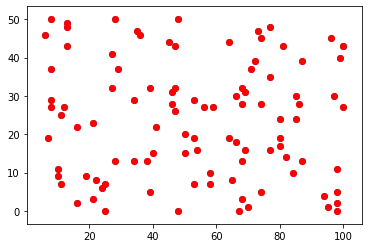

In [124]:
plt.scatter(num_friends, num_time)
plt.show
plt.scatter(num_friends_good, daily_minutes_good, color='red')
plt.show

# Теория вероятностей

Два события Е и F являются зависимыми, если какое-то знание о наступлении события Е дает нам информацию о наступлении события F, и наоборот. В противном случае они независимые.

Например, если мы дважды бросаем уравновешенную монету, то знание о том, что в первый раз выпадет орел, не дает никакой информации о том, что орел выпадает и во второй раз. Эти события независимые. С другой стороны, знание о том, что в первый раз выпадет орел, определенно, дает нам информацию о том, выпадут ли решки оба раза. (Если в первый раз выпадет орел, то, конечно же, исключаем случай, когда оба раза выпадают решки). Оба эти события зависимые.

С точки зрения математики, говорят, что два события E и F независимы, если вероятность их совместного наступления равна произведению вероятностей их наступления по отдельности:

> P(E,F) = P(E)P(F)

В примере с бросанием монеты вероятность события, что в первый раз выпадет орел, равна 1/2, вероятность события, что оба раза выпадут решки, равна 1/4, а вероятность, что в первый раз выпадет орел и оба раза выпадут решки, равна нулю.

## Условная вероятность

Повторим: когда два события E и F независимы, то по определению вероятность их совместного наступления равна P(E,F) = P(E)P(F)

Если же они являются зависимыми( и при этом вероятность F не равна 0) , то условная вероятность события Е при условии события F определяется так:

> P(E|F) = P(E,F) / P(F)

Под этим понимается вероятность наступления события Е при условии, что известно о наступлении события F

Для демонстрации условной вероятности обычно приводят следующий замысловатый пример с семьей, где есть двое детей, ей пол нам не известен. При этом предполагаем, что:

* каждый ребенок равновероятно является либо мальчиком, либо девочкой

* пол второго ребенка не зависит от пола первого

Тогда вероятность, что оба ребенка не девочки, равна 1/4, вероятность того, что ода девочка и один мальчик, равна 1/2 , а вероятность что обе девочки, равна 1/4.

Для начала узнаем вероятность наступления события, когда оба ребенка - девочки (В), при условии, что старший ребенок - девочка (G). Используя определение условной вероятности, получим: 

> P(B|G) = P(B,G) / P(G) = P(B) / P(G) = 1/2

Поскольку событие B и G (оба ребенка - девочкки и старший ребенок - девочка) представлено одним событием B. (Если известно, что оба ребенка - девочки, то верно, что старший ребенок - девочка).

И, скорее всего, такой результат будет в согласии с нашей интуицией.

А теперь узнаем, какова вероятность события, когда оба ребенка - девочки при условии, что как минимум один ребенок - девочка(L). И удивительная вещь - ответ будет отличаться от ранее полученного. 
Как и раньше, событие B и L (оба ребенка - девочки и не менее одного ребенка - девочка) представлено одним событием B. Однако получим:

> P(B|L) = P(B,L) / P(L) = P(B) / P(L) = 1/3

Все дело в том, что если известно, что как минимум один ребенок - девочка, то вероятность , что в семье имеется один мальчик и одна девочка, в два раза выше, чем вероятность, что имеются две девочки.

Можно убедиться в правильности рассужений, "сгенерировав" большое количество семей:

In [125]:
#Произвольно выбрать мальчика или девочку
def random_kid():
    return rnd.choice(['boy','girl'])

#проверка парадокса мальчика и девочки
both_girls = 0
older_girl = 0
either_girl = 0

rnd.seed(0)
for _ in range (1000000): #проводим эксперимент на совокупности из 100000 семей
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl +=1
print('P(обе|старшая): ', both_girls / older_girl)
print('P(обе|любая): ', both_girls / either_girl)

P(обе|старшая):  0.49821423931791337
P(обе|любая):  0.3324149960128336


## Теорема Байеса

Теорема Байеса позволяет "переставить" условные вероятности местами. Пусть нужно узнать вероятность некоего события Е, зависящего от наступления некоего другого события F, причем в наличии имеется лишь информация о вероятности события F, зависящего от наступление события Е. Двукратное применение (в силу симметрии) определения условной вероятности даст формулу Байеса:

> P(E|F) = P(E,F) / P(E) = P(F|E)P(E) / P(F)

Если событие F разложить на два взаимоисключающих события - событие "F и E" и событие "F и не Е" - и обозначить "Не E" (т.е. Е не наступает, как -Е, тогда:

> P(F) = P(F,E) + P(F, -E)

благодаря чему формула приводится к следующиму виду:

> P(E|F) = P(F|E)P(E) / P(F|E)P(E)+P(F|-E)PP(-E)

Именно так формулируется теорема Байеса.

Данную теорему часто используют, чтобы продемонстрировать, почему аналитики данных умнее врачей. Представим, что есть некая болзень, которая поражает 1 из каждый 10 000 человек, и можно пройти обследование, выявляющее эту болзень, которое в 99% даст правильный результат ("Болен", если заболевание имеется и "не болен" - в противном случае).

Что означает положительный результат обследования? Пусть Т - событие, что "результат Вашего обследования положительный" , а D - событие, что "У вас имеется заболевание". Тогда согласно теореме Байеса, вероятность наличия заболевания при положительном результате обследования равна:

> P(D|T) = P(T|D)P(D) / P(T|D)P(D) + P(T|-D)P(-D)

По условию задачи известно, что P(T|D) = 0.99 (вероятность, что заболевший получит положительный результат обследования), P(D) = 1/10000 = 0.0001 (вероятность, что любой человек имеет заболевание), P(T|-D) = 0.01 (вероятность , что здоровый человек получит положительный результат обследования) и P(-D) = 0.9999 (вероятность, что любое данное лицо не имеет заболевания). Если подставить эти числа в теорему Байеса, то: 

> P(D|T) = 0.98%

т.е менее 1% людей, которые получат положительный результат обследования, имеют это заболевание на самом деле.
В то время как для аналитика данных задача решается простым подсчетом, большинство врачей определяют навскиду , что приблизительно P(D|T) = 2 

Интуитивно более понятный способ - представить популяцию численностью 1 млн. человек. 100 из них ожидаемо имеют заболевание, из которых 99 получиили положительный результат обследования. С другой стороны, 999 900 из них ожидаемо не имеют заболевания, из которых 9999 получили положительный результат обследования, вследствие чего можно ожидать, что только 99 из (99 + 9999) получивших положительный результат обследования имеют это заболевание на самом деле. 

## Случайные величины 

Случайная величина - это переменная, чьим возможным значениям поставлено в соответсвие распределение вероятностей. Простая случайная величина рана 1, если подброшенная монета повернется орлом, и 0 , если повернется решкой. Более сложная величина может измерять число орлов, наблюдаемых при 10 бросках, или значение, выбираемое из диапазона range(10) , где каждое число равновозможное. 

Связанное со случайной величиной распределения вероятностей предоставляет ей вероятности, ск оторыми она реализует каждое из своих возможных значений. Случайная величина броска монеты равна 0, с вероятностью 0.5 и 1 с той же вероятностью. Случайная величина диапазона range(10) имеет распределение, где каждому числу от 0 до 9 поставлена в соответсвие вероятность 0.1

Мы иногда будем говорить о (среднем) ожидаемом значении или математическом ожидании случайной величины, которое представляет собой взвешенную сумму произведений каждого её значения на его вероятность. Среднее ожидаемое значение броска монеты равно 1/2 (=0 * 1/2 + 1 * 1/2) среднее ожидаемое значение диапазона range(10) равно 4.5
Случайные величины могут обсулавливаться событиями точно так же , как и другие события. 
Пользуясь примером с двумя детьми выше , если Х - это случайная величина , представляющая число девочек, то Х равно 0 с вероятностью 1/4, 1 с вероятностью 1/2 и 2 с вероятностью 1/4. 

Можно определеить новую случайную величину Y , которая дает число девочек при условии, что как минимум один ребенок - девочка. Тогда Y равно 1 с вероятностью 2/3 и 2 с вероятностью 1/3. А также определеить случайную величину Z , как число девочек при условии, что старший ребенок - девочка, равную 1 с вероятностью 1/2 и 2 с вероятностью 1/2
В рассматриваемых задачах случайные величины будут использовать по большей части неявным образом, без привлечения к ним особого внимания. Онако если копнуть глубже, то их можно обязательно обнаружить.

## Непрерывные распределения

Бросание монеты соотвествует дискретному распределению, которое ставит в соответсвии положительную вероятность пронумерованным исходам дискретного вероятностного пространства. Однако нередко требуется моделировать распределения на непрерывном пространстве исходов. (для целей изложения в книге эти исходы всегда будут вещетсвенными числами, хотя в реальной жизни это не всегда так).
Например, равномерное распределение назначает одинаковый вес всем числам между 0 и 1.
Поскольку между 0 и 1 находится бесконечное количество чисел, то, значит, вес, который оно назначет индивидуальным точкам, должен с неизбежностью быть равен нулю. По этой причине непрерывное распределение расстояние вероятностей представляют плонстью распределения вероятностей(probability density function, pdf) , также именуемое дифференциальной функцией распределения (ДФР), такой, что вероятность наблюдать значение в определенном интервале равна интегралу от дифференциальной функции, взятому в этих пределеах.

Функция плотности(или ДФР) равномерного распределения - это всего лишь:

In [126]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

Часто нас больше будет интересовать кумулятивная функция распределения (cumulative distribution fundtion, cdf), также именуемая интегральной функцией распределения(ИФР), которая определяет вероятность, что случайная величина меньше или равна некоторому значению. Реализация ИФР равномерного распределения элементарна: 

In [127]:
def uniform_cdf(x):
    '''Возвращает вероятность того, что равномерно распределенная случайная величина <= х'''
    if x < 0: return 0
    if x < 1: return x
    else: return 0 

## Нормальное распределение

Королем распределений является нормальное распределение. Это классическое распределение в форме колокола польностью определяется двумя параметрами: Мю - математическим оэиданием(средним значением) , и Сигмой - стандартным отклонением. Математическое ожидание указывает на смещение колока, а стандартное отклонение - на его "ширину" (или масштаб). Его функция распределения(ДФР) имеет следующий вид:

> f(X|m,o)  = 1 / sqrt(2PI* o ) * exp( - (x - m)^2 / 2o^2)

Которую можно реализовать таким образом:


In [128]:
# ДФР нормального распределения

def normal_pdf(x , mu=0 , sigma = 1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2 / 2 / sigma**2)/(sqrt_two_pi * sigma))

На рисунке для наглядности приведены графики некоторых ДФР:

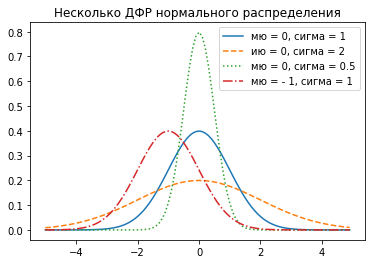

In [129]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-', label = "мю = 0, сигма = 1")
plt.plot(xs,[normal_pdf(x,sigma=2)for x in xs], '--', label = 'ию = 0, сигма = 2')
plt.plot(xs,[normal_pdf(x,sigma=0.5)for x in xs], ':' , label = 'мю = 0, сигма = 0.5')
plt.plot(xs,[normal_pdf(x, mu = -1)for x in xs],'-.', label = 'мю = - 1, сигма = 1')
plt.legend()
plt.title('Несколько ДФР нормального распределения')
plt.show()

При мю = 0 и сигма = 1 оно называется стандартным нормальным распределением. Если Z - это стандартная нормально распределенная случайная величина, то оказывается, что 
>X = sigma * Z + mu

тоже является нормально распределенной, но с математическим ожиданием мю и стандартным отклонением сигма. И наоборот, если X - нормально распределенная случайная величина с математическим ожиданием мю и стандартным отклонением сигма, то

>Z = X - mu / sigma

тоже явлеяется нормально распределенной, но с математическим ожиданием мю и стандартным отклонением сигма. И наоборот, если Х - нормально распределенная случайная величина с математическим ожиданием мю и стандартным отклонением сигма, то

>Z = X - mu / sigma

есть стандартная нормально распределенная случайная величина

Интегральную функцию распределения для нормального распределения невозможно написать, пользуясь лишь "элементарными" средствами, однако это можно сделать при помощи питоновской функции интеграла вероятности math.erf:

In [130]:
#ИФР нормального распределения

def normal_cdf(x, mu = 0 , sigma = 1):
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) /2

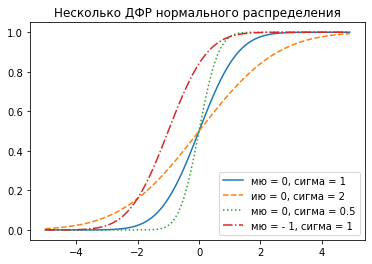

In [131]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs], '-', label = "мю = 0, сигма = 1")
plt.plot(xs,[normal_cdf(x,sigma=2)for x in xs], '--', label = 'ию = 0, сигма = 2')
plt.plot(xs,[normal_cdf(x,sigma=0.5)for x in xs], ':' , label = 'мю = 0, сигма = 0.5')
plt.plot(xs,[normal_cdf(x, mu = -1)for x in xs],'-.', label = 'мю = - 1, сигма = 1')
plt.legend(loc = 4)
plt.title('Несколько ДФР нормального распределения')
plt.show()

Иногда требуется обратить интегральную функцию normal_cdf , чтобы найти значение, соответствующее указанной вероятности. Простой способ вычислить обратную функцию отсутствует , однако если учесть, что normal_cdf - нерперывная и монотонно возрастющая функция, то можно применить двоичный поиск.

In [132]:
#Обратная ИФР нормального распределения
# (tolerance = это константа точности)

def inverse_normal_cdf(p, mu=0 , sigma = 1 ,tolerance = 0.00001):
    '''Найти приближенную инверсию, используя двоичный поиск'''
    # если не стандартизировано, то стандартизировать и прошкалировать
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance = tolerance)
    low_z , low_p = -10.0 , 0
    hi_z , hi_p = 10.0 , 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z , mid_p
        elif mid_p > p:
            hi_z , hi_p = mid_z , mid_p
        else:
            break
        return mid_z

Функция многократно делит интервалы пополам, пока не выйдет на точку Z , которая достаточно близка к требуемой вероятности.

## Центральная предельная теорема.

Одна из пичин распространенности нормального распределения заключается в цетральной предельной теореме(ЦПТ), согласно кторой (по существу) случайная величина, определенная как среднее большого числа независимых и идентично распределенных случайных величин, сама является приближенно нормально распределенной.

В частности, если x1,x2,....,xn - случайные величины с математическим ожиданием(средним значением) мю и стандартным отклонением сигма и если n большое, то

> 1 / n (x1+x2+...+xn)

приближенно нормально распределенная величина с математическим ожиданием мю и стандартным отклонением sigma / sqrt(n) . Эквивалентным образом ( и чаще с большей практической пользой), 

> (x1 + x 2 + ... xn ) - mu * n / sigma * sqrt(n)

есть приближенно нормально распределенная величина с нулевым математическим ожиданием и стандартным отклонением, равным 1.

Это можно лекго проиллюстрировать, обратившись к биномиально распределенным случайным величинам, имеющим два параметра - n и p. 
Биномиальная случайная величина binomial(n , p) - это просто сумма n независимых случайных величин с распределением Бернулли bernoulli(p) , таких, что значение каждой из них равно 1 с вероятностью p и 0 c вероятностью 1 - p


In [133]:
#независимое испытание Бернулли, в котором имеется всего
#два случайных исхода ( 1 и 0 ) с постоянной вероятностью
def bernoulli_trial(p):
    return 1 if rnd.random() < p else 0

#биномиальное распределение
def binominal( n, p):
    return m.sum(bernoullii_trial(p) for _ in range(n))


Математическое ожидание случайной величины с распределением Бернулли bernoulli(p) равно p , её стандартное отклонение равно sqrt(p*(1-p)). 
Согласно центральной предельной теореме, при больших n биномиальныя случайная еличина binomial(n,p) приближенно нормально распределена с математическим ожиданием mu = n * p и стандартным отклонением sigma = sqrt(n * p * ( 1 - p))



#Гипотеза и вывод

> По-настоящему умного человека характеризует то, что им движет статистика. 
(с)Джордж Бернанрд Шоу

Научная сторона науки о данных часто подразумевает формулировку и проверку статистических гипотез о данных и процессах, которые их порождают.

## Проверка статистических гипотез.

Зачастую требуется выполнить проверку вероястноти, что определенная статистическая гипотеза является правильной. 
Статистическая гипотеза - утверждение типа "эта монета уравновешена" , или "аналитики данных больше предпочитают Пайтон, чер R", или "Скорее человечество переборить коронавирус, не понимая как, но будут придерживаться карантина."
 Все эти утверждения могут быть транслированы в статистики о данных. В условиях нескольких исходных предположений эти статистики можно рассматривать в качестве наблюдений за случайными величинами с известными распределениями, которые позволяют делать утверждения о возможности, что эти исходные предположения верны.
 Классическая трактовка подразуменвает наличие главной или нулевой гипотезы H0 , которая представляет некую позицию по умолчанию, и конкурирующей или альтернативной гипотезы H1 , относительно которой мы хотим её сопоставить. Чтобы принять решение, можно или отклонить H0 как ошибочную, или принять её как верную, используя статистики. По-видимому, будет разумнее показать это на примере. 
 
 ## Пример : бросание монеты
 
Пусть имеется монета, которую требуется проверить, уравновешена ли она. Для этого елается исходное предположение, что монета имеет некую вероятность p выпадения орла, и выдвигается нулевая гипотеза о том, что монета уравновешена, т.е p = 0.5 . Проверим ее, сопоставив с альтернативной гипотезой p != 0.5

В частности, првоерка нулевой гипотезы будет состоять в бросании монеты n раз и подсчет количества орлов X. Каждый бросок монеты - это испытание Бернулли, где Х - это биномиальная случайная величина, которую как мы уже убедились можно приближенно выразить при помощи нормального распределения.

In [134]:
#аппроксимация биномиальной случайной величины нормальным распределением. 
def normal_approximation_to_binomial(n,p):
    '''находит mu и sigma, которые соответствуют binomial(n,p)'''
    mu = p * n 
    sigma = math.sqrt(p*(1-p)*n)
    return mu, sigma

В случае если случайная величина подчиняется нормальному распределнию, то для вычисления вероятности, что ее реализованное значение лежит в пределах (или за пределами) определенного интервала, можно воспользоваться функцией normal_cdf для вычисления ИФР нормального распределения.


# Машинное обучение

## Моделирование

В сущности, модель - подробное описание математической(или вероятностной) связи, которая существует между различными величинами. 

Например, если необходимо собрать деньги на сайт социальной сети, то следует построить бизнес-модель(скорее всего, она будет в виде электронной таблицы), которая принимает входящие аргументы, такие данные, как "число пользователей", "доход от рекламы на одного пользователя", и "число сотрудников", и возвращает годовую прибыль на ближайшие несколько лет. Поваренная книга приводит к модели, которая соотносит входящий аргументы "число едоков" и "аппетит" с результирующим количеством необходимых ингредиентов. А те, кто когда-либо смотрел по телевизору покер, знают, что "вероятность победы" каждого игрока оценивается в режиме реального времени на основе модели, которая учитывает карты, раскрытые на конкретный момент времени и распределение карт в колоде. 

Бизнес-модель, вероятно, будет основана на простых математических соотношениях: доходы минус расходы, где доходы - это количество проданных единиц, помноженное на среднюю цену, и т.д. Модель поваренной книги, вероятно, будет основана на методе проб и ошибок - кто-то пошел на кухню и опробовал разные комбинации ингредиентов, пока не нашел что нравится. 

А модель покера будет основана на теории вероятностей, правилах игры в покер и некоторых достаточно безобидных предположениях о случайных процессах , при помощи которых карты раздаются. 

### типы моделей:
* С учителем - есть выборка, маркированная правильными ответами, на которых проходит обучение
* Без учителя, где правильные ответы не заданы 
* С частичным обучением - только некоторые данные маркированны правильными ответами
* Динамическое обучение - модель должна постоянно приспосабливаться ко вновь прибывающим данным.

## переобучение и недообучение: 

Переобучение, приводящее к прогнозной модели, которая хорошо работает на данных из обучающей выборки, но при этом плохо обобщает на любых новых данных.

Это явление может быть вызвано тем, что модель обучена шуму в данных либо обучена различать конкретные входящие значения , а не те факторы, которые на самом деле носят для требуемого результата предсказательный характер. 

Другую сторону этого явления представляет недообучение, которое приводит к прогнозной модели, не работающей даже на обучающей выборке. 

На рисунке выполнена полиномиальная аппроксимация выборки из данных. 

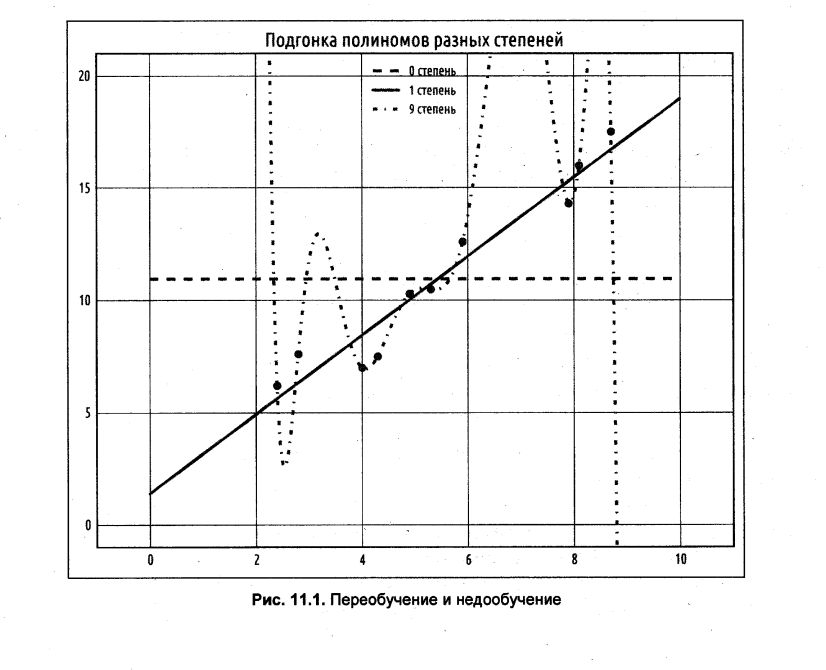

Прим.конспекта.

Полином - многочлен, полиномиальная - значит о многочленах
Аппроксимация -  научный метод, состоящий в замене одних объектов другими, в каком-то смысле близкими к исходным, но более простыми(это тоже самое что мы делаем когда не хочем делать все замеры на лабах по физике)

Слишком сложные модели приводят к переобучению и плохо обобщают за пределами данных, на которых они обучены.
### Как сделать так, чтобы модели не были слишком сложные?
Наиболее фундаментальный подход предполагает использование разных данных для обучения модели и для проверки ее качества. 

Простейший способ состоит в разбиении набора данных, благодаря чему(например) две трети используются для обучения модели, после чего производительность модели измеряется на оставшейся трети:

In [135]:
#сегментация данных
# НЕ ВОЛНУЙТЕСЬ ТАКОЕ УЖЕ ЕСТЬ ВО МНОГИХ БИБЛИОТЕКАХ
def split_data(data,prob):
    '''разбиение данных на части [prob, 1 - prob]'''
    results = [], []
    for row in data:
        results[0 if random.random()< prob else 1].append(row)
    return results

Часто в нашем распоряжении будут матрица х, состоящая из входящих переменных, и вектор у - из выходящих переменных. В этом случае необходимо разметить соответсвутющие значения либо в обучающей, либо в контрольной выборке:

In [136]:
#разбиение на обучающую и контрольную выборки
def train_test_split(x,y,test_pct):
    data = zip(x,y) #объединить соответсвующие значения
    train, test = split_data(data, 1 - test_pct) #разбить список пар
    x_train , y_train = zip(*train)#трюк с раъединением списков
    x_test, y_test = zip(*test)
    return x_train , x_test, y_train, y_test

Благодаря этому можно сделать что-то наподобие следующего:

Если модель переобучена, то можно надеяться, что она покажет очень слабые результаты на(совершенно автономных) контрольных данных. Говоря иначе, если она хорошо работает на контрольных данных, то уровень уверенности в том, что модель обучене нежелеи переобучена, гораздо выше.

Тем не менее, в нескольких случаях это может оказаться неверным.
Во-первых, в контрольный и обучающей выборках могут иметься типичные схемы(паттерны), которые не обобщаются на более крупный набор данных.

 Например, пусть набор данных состоит из действий пользователей, по одной строке на каждого пользователя в неделю. В таком случае большинство пользователей будут появляться как в обучающей выборке, так и в контрольной.  Как результат  некоторые модели научатся определеять пользователей, а не искать связи с участием атрибутов. Данная проблема не приводит к большим неприятность, однако она может быть.
 
Во вторых, и это представляет более значительную проблему, когда разбивка на контрольну и обучающую выборки используется не только для того, чтобы садить о модели, но и для того, чтобы выбирать среди нескольких моделей. В этом случае, несмотря на то, что каждая отдельная модель может оказаться непереобученной , обучающее метаправило, которое заставляет "выбирать ту модель, которая на контрольной выборке демонстрирует наилучшие результаты", превращает функцию контрольной выборки во вторую обучающую выборку. 

В такой ситуации необходимо разделить данные на три части. 

## Правильность модели

Почему критерий "правильность" не используют для измерения качества модели. 

Пусть строится модель, которая должна формулировать бинарные суждения. Является ли это письмо спамом? Следует ли нанять этого претендента? Является ли этот авапассажир скрытым террористом?

При наличии набора маркированных данных и такой прогнозной модели каждая точка данных принадлежит одной из четырех категорий:

* истинноположительная: правильно предсказано, что ответ +
* ложноположительная: по факту -, а показало +. Это ошибка первого рода
* ложноотрицательная: по факту +, а показало -. Это ошибка второго рода
* истиннотрицательная: по факту - и показало -.

#### показатель точности определен в виде доли правильных предсказаний:


In [137]:
#точность
def accuracy(tp,fp,fn,tn):
    correct = tp+tn #правильный если истинноположит. и истинноотрицат.
    total = tp + fp + fn + tn
    return correct / total

In [138]:
accuracy(70,4930,13930,981070)

0.98114

В соответсвии с стандартной практики принято обращаться к сочетанию:
точности(или прецизионности) и полноты. Причем здесь точность - это доля
истинноположительных предсказаний относительно всех положительных предсказаний:


In [139]:
def precision(tp,fp,fn,tn):
    return tp/ (tp+fp)

In [140]:
precision(70,4930,13930,981070)

0.014

А полнота - доля положительный предсказаний, которую модель идентифировала:

In [141]:
def recall(tp,fp,fn,tn):
    return tp/(tp+fn)

In [142]:
recall(70,4930,13930,981070)

0.005

Оба результата ужасны и отражают тот факт, что сама модель ужасна.


# Метод К ближайших соседей.
> Если желаешь досадить соседям, расскажи им правду о них.

## Модель

Прогнозная модель классификации на основе ближайших соседей является одной из простейших. В ней не делается никаких математических допущений и не требуется какого-то тяжелого функционального аппарата. Единственоое что требуется, это:
* Некоторое представление о расстоянии
* Предположение, что точки, расположенные друг к другу близко - подобны.

Большинство методов, которые рассматриваются в этой книге, обращаются ко всей выборке в целом с тем, чтобы в результате обучения извлечь из данных схемы или закономерности. В отличие от них метод ближайжих соседей вполне осознанно пренебрегает значительной частью информации, поскольку предсказание для любой новой точки завист всего лишь от нескольких ближайших к ней точек. 

* Ближайшие соседи не помогут понять движущие силы любого изучаемого явления.

* входе - некоторые точки данных и соответсвующий набор маркировок. Маркой могут быть True и False, либо могут быть категориями, именами.

В нашем случае точки данных будут представленны векторами, вследствие чего можно воспользоваться функцией расстояния distance. 
* прим. конспекта Данная функция лежит в нажале блокнота в подразделе векторов


Мы рассматриваем выборы в правительство. Демократы vs Республиканцы.
Пусть число k = 3 или 5. Тогда, если необходимо классифицировать некоторые новые точки данных, то следует найти k ближайших маркированных точек и дать им проголосовать за новый результат. 

Для этого потребуется функция, которая подсчитывает голоса. Одна из возможностей заключается в следующем:


In [143]:
#грубый подсчет большинства голосов
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

Однако она ничего не предпринимает в ситуации равного числа голосов.
В таком случае, имеется несколько вариантов:

* выбрать одного из победителей случайным образом.

* взвесить голоса по удаленности и выбрать взвешенного победителя.

* уменьшать k, пока не будет найден единственный победитель. 

Реализуем третий вариант:

In [144]:
# отбор по большинству голосов
def majority_vote(labels):
    '''подразумевает, что метки упорядочены от ближайшей до самой удаленной'''
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    if num_winner == 1:
        return winner
    else:
        return majority_vote(labels[:-1])

Такой подход обязательно рано или поздно сработает, так как в худшем случае все сведется только к одной метке, которая и будет победителем. 

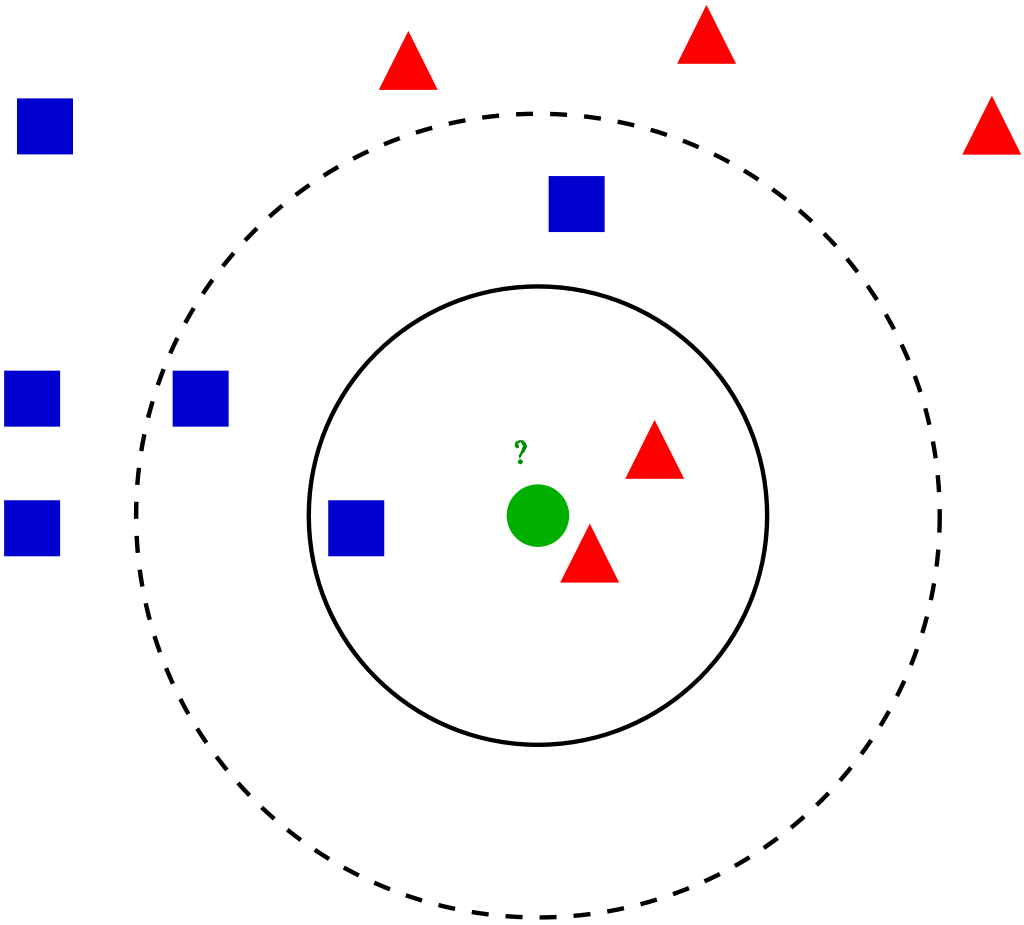

Пример классификации {\displaystyle k}k-ближайших соседей. Тестовый образец (зелёный круг) должен быть классифицирован как синий квадрат (класс 1) или как красный треугольник (класс 2). Если k = 3, то он классифицируется как 2-й класс, потому что внутри меньшего круга 2 треугольника и только 1 квадрат. Если k = 5, то он будет классифицирован как 1-й класс (3 квадрата против 2 треугольников внутри большего круга)

In [151]:
#классификация на основе k ближайших соседей
def knn_classify(k, labeled_points, new_point):
    '''каждая маркированная точка должна быть представленна парой (точка, метка)'''
    
    #упорядочить маркированные точки от ближайшей до самой удаленной
    by_distance = sorted(labeled_points,
                         key= lambda point, _ :distance(point,new_point))
    
    #найти метки для k ближайших
    k_nearest_labels = [label for _ , label in by_distance[:k]]
    
    #и дать им проголосовать 
    return majority_vote[k_nearest_labels]
    